<a href="https://colab.research.google.com/github/Anishpatil-108/LGMVIP-DataScience/blob/main/_TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA SCIENCE INTERN @Lets Grow More LGMVIP October
##Name: Anish Patil
###TASK 4 (INTERMEDIATE LEVEL): Prediction using Decision Tree  Algorithm
Create the Decision Tree classifier and visualize it graphically. The purpose of creating this model is that if we feed any new data to this classifier, it would be able to predict the right class accordingly​.

#IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [3]:
col_name = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']

In [4]:
dataset = pd.read_csv(url, names = col_name)

#DATA PREPARATION

In [5]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.size

750

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
pd.crosstab(dataset.Class, [dataset.Sepal_Length, dataset.Sepal_Width])

Sepal_Length    4.3 4.4         4.5 4.6          ... 7.3 7.4 7.6 7.7             7.9
Sepal_Width     3.0 2.9 3.0 3.2 2.3 3.1 3.2 3.4  ... 2.9 2.8 3.0 2.6 2.8 3.0 3.8 3.8
Class                                            ...                                
Iris-setosa       1   1   1   1   1   1   1   1  ...   0   0   0   0   0   0   0   0
Iris-versicolor   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
Iris-virginica    0   0   0   0   0   0   0   0  ...   1   1   1   1   1   1   1   1

[3 rows x 116 columns]

#DATA VISUALIZATION

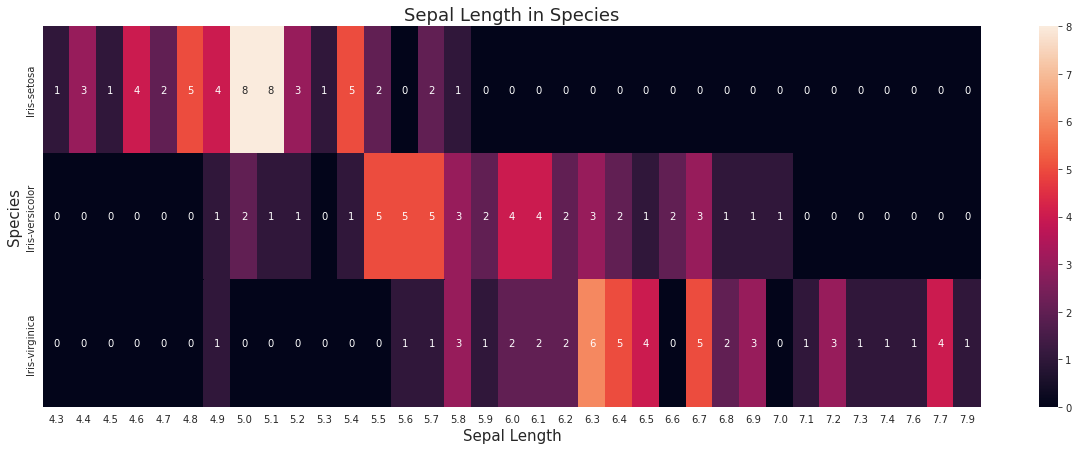

In [13]:
import matplotlib.pyplot as plt
sns.set_style('white')
import seaborn as sns
plt.figure(figsize=(21,7))
sns.color_palette("tab10")
sns.heatmap(pd.crosstab([dataset.Class], [dataset.Sepal_Length]),cmap ="rocket", annot = True, cbar = True)
plt.xlabel('Sepal Length', size = 15)
plt.ylabel('Species', size = 15)
plt.title('Sepal Length in Species', size = 18)
plt.show()

#TRAIN-TEST SPLIT MODEL

In [14]:
x = dataset.iloc[:,:4].values
y = dataset.iloc[:,4:5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [15]:
print(x_train.shape)

(120, 4)


In [16]:
print(x_test.shape)

(30, 4)


In [17]:
print(y_train.shape)

(120, 1)


In [18]:
print(y_test.shape)

(30, 1)


#DECISION TREE MODEL

In [19]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [21]:
x = dataset.drop("Class",axis=1)
y = dataset["Class"]

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

MODEL ACCURACY

In [23]:
model.score(x_test,y_test)

0.9777777777777777

In [24]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


PREDICTION OF MODEL

In [25]:
print("Predicted score for the given values is :",model.predict([[5.1,5.7,5.3,0.1]]))

Predicted score for the given values is : ['Iris-setosa']


#DECISION TREE

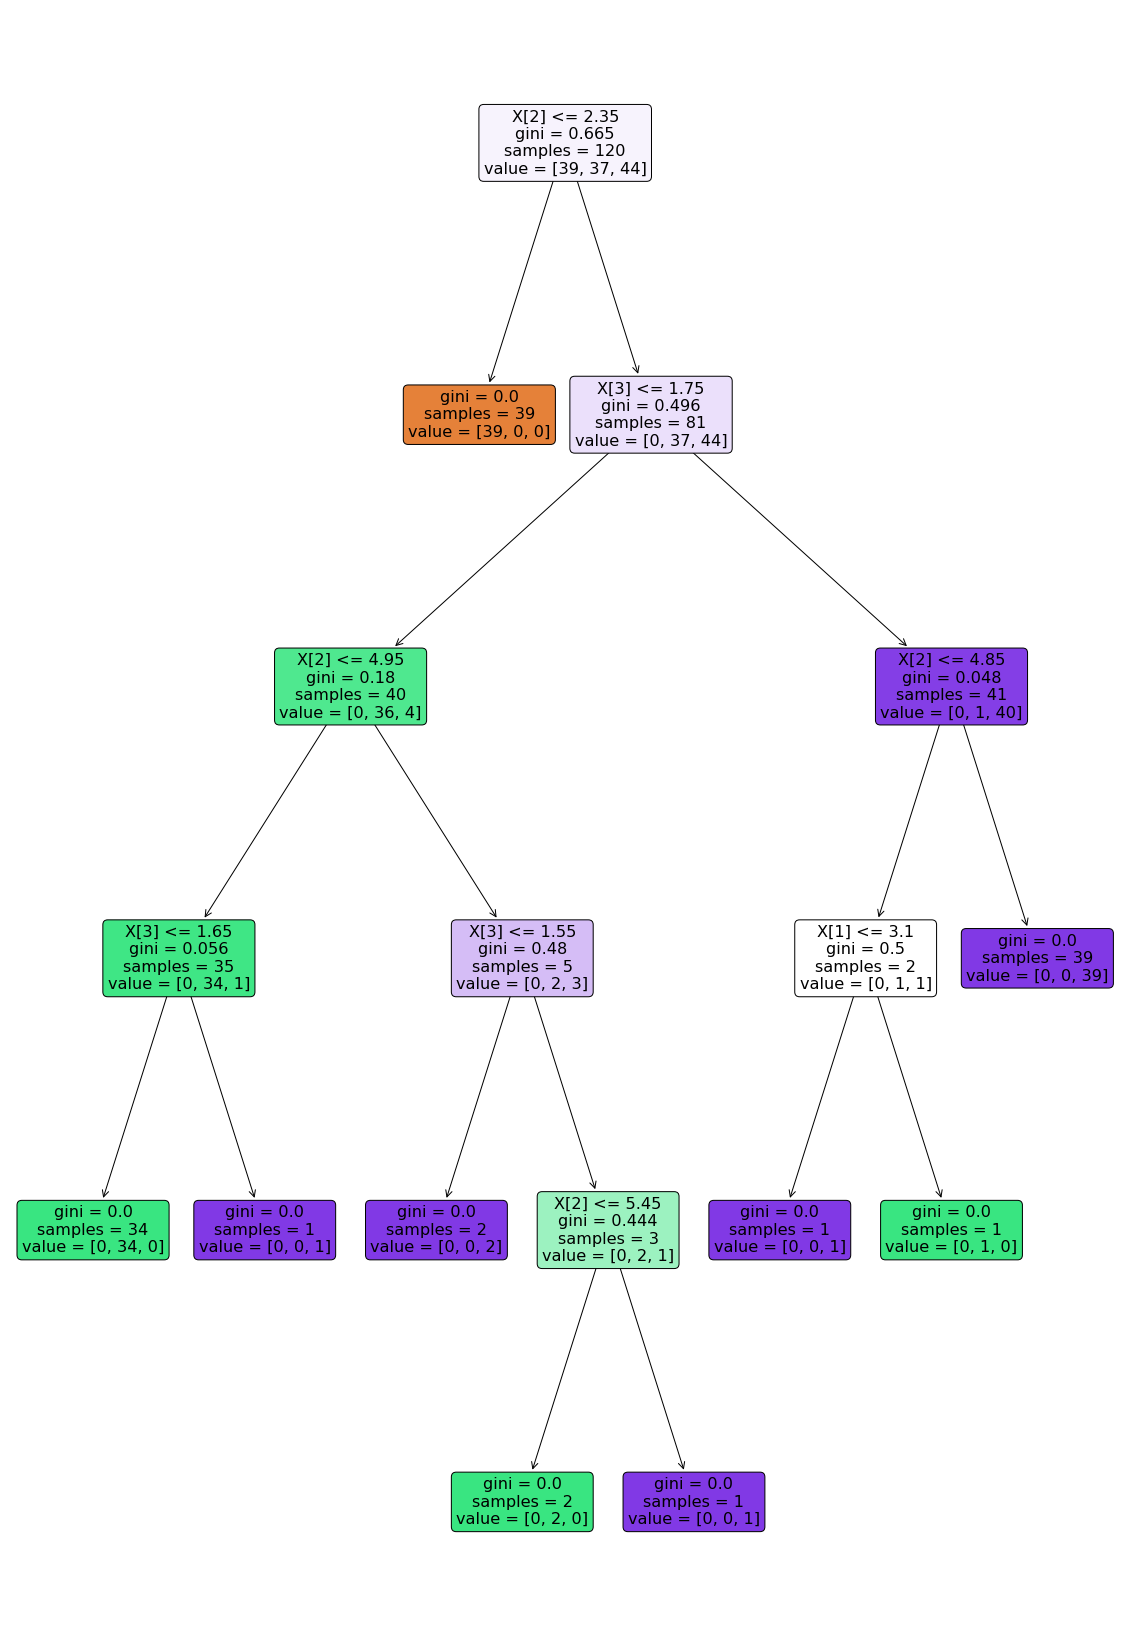

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (20,30))
tree.plot_tree(model, filled=True, rounded=True)
plt.show()